In [1]:
%matplotlib inline

# Import necessary libraries
!pip install mglearn
!git clone https://github.com/brighamfrandsen/econ484.git
%cd econ484/utilities
from preamble import *
%cd /content/econ484/data

plt.rcParams['image.cmap'] = "gray"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.6 MB/s eta 0:00:00
Cloning into 'econ484'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 119 (delta 38), reused 26 (delta 12), pack-reused 3 (from 1)
Receiving objects: 100% (119/119), 2.89 MiB | 3.84 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/econ484/utilities


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brighamfrandsen/econ484/blob/master/examples/pca.ipynb)

## Principal Components Analysis

### Motivation: Too many regressors to run a regression:

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [7]:
housedata=pd.read_csv('./housingprices.csv',nrows=10)
print(housedata.head())
print("Shape: {}".format(str(housedata.shape)))

   price     crime   nox  rooms  ...  lowstat  lprice  lnox  lproptax
0  24000  6.00e-03  5.38   6.57  ...     4.98   10.09  1.68      5.69
1  21599  2.70e-02  4.69   6.42  ...     9.14    9.98  1.55      5.49
2  34700  2.70e-02  4.69   7.18  ...     4.03   10.45  1.55      5.49
3  33400  3.20e-02  4.58   7.00  ...     2.94   10.42  1.52      5.40
4  36199  6.90e-02  4.58   7.15  ...     5.33   10.50  1.52      5.40

[5 rows x 12 columns]
Shape: (10, 12)


In [8]:
x=housedata.loc[:,[j for j in housedata.columns if j not in ('price','lprice')]]
print(x.head())

      crime   nox  rooms  dist  ...  stratio  lowstat  lnox  lproptax
0  6.00e-03  5.38   6.57  4.09  ...     15.3     4.98  1.68      5.69
1  2.70e-02  4.69   6.42  4.97  ...     17.8     9.14  1.55      5.49
2  2.70e-02  4.69   7.18  4.97  ...     17.8     4.03  1.55      5.49
3  3.20e-02  4.58   7.00  6.06  ...     18.7     2.94  1.52      5.40
4  6.90e-02  4.58   7.15  6.06  ...     18.7     5.33  1.52      5.40

[5 rows x 10 columns]


In [9]:
y=housedata.loc[:,'price']

In [10]:
# Instantiate a model object:
lm = linear_model.LinearRegression()
# Fit the model:
lm.fit(x,y)

lm.coef_

array([-100314.719,   15789.977,   18814.085,     786.506,    5031.801,
         -4426.364,   -7099.785,     706.867,    2964.672,   -1089.855])

The huge coefficients are evidence that the X'X matrix is not full rank here

Let's see if we can fix this using PCA. Let's just keep first 3 components. Before doing PCA, always standardize your variables

In [11]:
# print out summary statistics of original x :
x.describe()

,crime,nox,rooms,dist,...,stratio,lowstat,lnox,lproptax
count,1.00e+01,10.00,10.00,10.00,...,10.00,10.00,10.00,10.00
mean,8.05e-02,4.95,6.46,5.64,...,16.78,11.02,1.60,5.58
std,7.12e-02,0.34,0.53,0.75,...,1.68,8.71,0.07,0.16
min,6.00e-03,4.58,5.63,4.09,...,15.20,2.94,1.52,5.40
25%,2.78e-02,4.61,6.05,5.12,...,15.20,5.04,1.53,5.42
50%,5.05e-02,4.96,6.42,6.00,...,16.55,7.24,1.60,5.59
75%,1.31e-01,5.24,6.89,6.06,...,18.48,15.93,1.66,5.74
max,2.11e-01,5.38,7.18,6.59,...,18.70,29.93,1.68,5.74


In [12]:
from sklearn.preprocessing import StandardScaler
# Instantiate a "scaler" object:
scaler = StandardScaler()
# calculate means and standard deviations of columns of x:
scaler.fit(x)

# subtract off means, divide by std devs:
x_scaled = scaler.transform(x)

print(x_scaled.shape)
pd.DataFrame(x_scaled).describe()


(10, 10)


,0,1,2,3,...,6,7,8,9
count,1.00e+01,1.00e+01,1.00e+01,1.00e+01,...,1.00e+01,1.00e+01,1.00e+01,1.00e+01
mean,1.55e-16,-1.38e-15,-8.88e-16,-6.00e-16,...,3.60e-15,-1.67e-16,-1.02e-15,-3.51e-15
std,1.05e+00,1.05e+00,1.05e+00,1.05e+00,...,1.05e+00,1.05e+00,1.05e+00,1.05e+00
min,-1.10e+00,-1.12e+00,-1.66e+00,-2.18e+00,...,-9.93e-01,-9.78e-01,-1.13e+00,-1.21e+00
25%,-7.81e-01,-1.04e+00,-8.14e-01,-7.35e-01,...,-9.93e-01,-7.24e-01,-1.04e+00,-1.06e+00
50%,-4.44e-01,5.82e-02,-6.22e-02,5.16e-01,...,-1.45e-01,-4.58e-01,6.78e-02,4.07e-02
75%,7.44e-01,9.00e-01,8.75e-01,5.94e-01,...,1.07e+00,5.94e-01,9.06e-01,1.04e+00
max,1.93e+00,1.33e+00,1.45e+00,1.34e+00,...,1.21e+00,2.29e+00,1.30e+00,1.04e+00


In [13]:
from sklearn.decomposition import PCA
# keep the first three principal components of the data
pca = PCA(n_components=3)
# calculates factor loadings
pca.fit(x_scaled)

# transform data onto the first three principal components
x_pca = pca.transform(x_scaled)
print("Original shape: {}".format(str(x_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

print("PCA components:\n{}".format(pca.components_))
x_pca


Original shape: (10, 10)
Reduced shape: (10, 3)
PCA components:
[[ 0.308  0.338 -0.327  0.082  0.273  0.36  -0.352  0.324  0.339  0.359]
 [ 0.342 -0.269 -0.092  0.639  0.421 -0.156  0.212  0.217 -0.266 -0.17 ]
 [-0.084  0.186  0.56   0.375  0.319  0.15  -0.134 -0.559  0.181  0.132]]


array([[ 0.429, -3.79 ,  0.077],
       [-1.861, -0.565, -1.069],
       [-2.56 , -0.84 ,  0.129],
       [-2.968,  0.95 ,  0.44 ],
       [-2.803,  1.172,  0.401],
       [-2.513,  1.105, -0.35 ],
       [ 2.393, -0.478,  0.471],
       [ 2.857,  0.31 ,  0.331],
       [ 3.951,  1.144, -1.017],
       [ 3.076,  0.991,  0.586]])

Now re-run the regression!

In [14]:
# Do on your own, and print out the coefficients


#Cheat

In [15]:
model = lm.fit(x_pca,y)
model.coef_

array([-1884.17 ,   402.138,  4916.622])

# Obtain predicted prices:

In [16]:
predicted_prices =lm.predict(x_pca)
predicted_prices

array([24444.654, 24424.12 , 31522.331, 34538.299, 34124.471, 29858.3  ,
       24013.934, 22770.413, 14416.64 , 23885.838])

In [17]:
lm.predict([[-3,0,1]])

array([36969.031])

#Some even cooler stuff you can do with PCA

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

### Dimensionality Reduction, Feature Extraction and Manifold Learning
#### Principal Component Analysis (PCA)

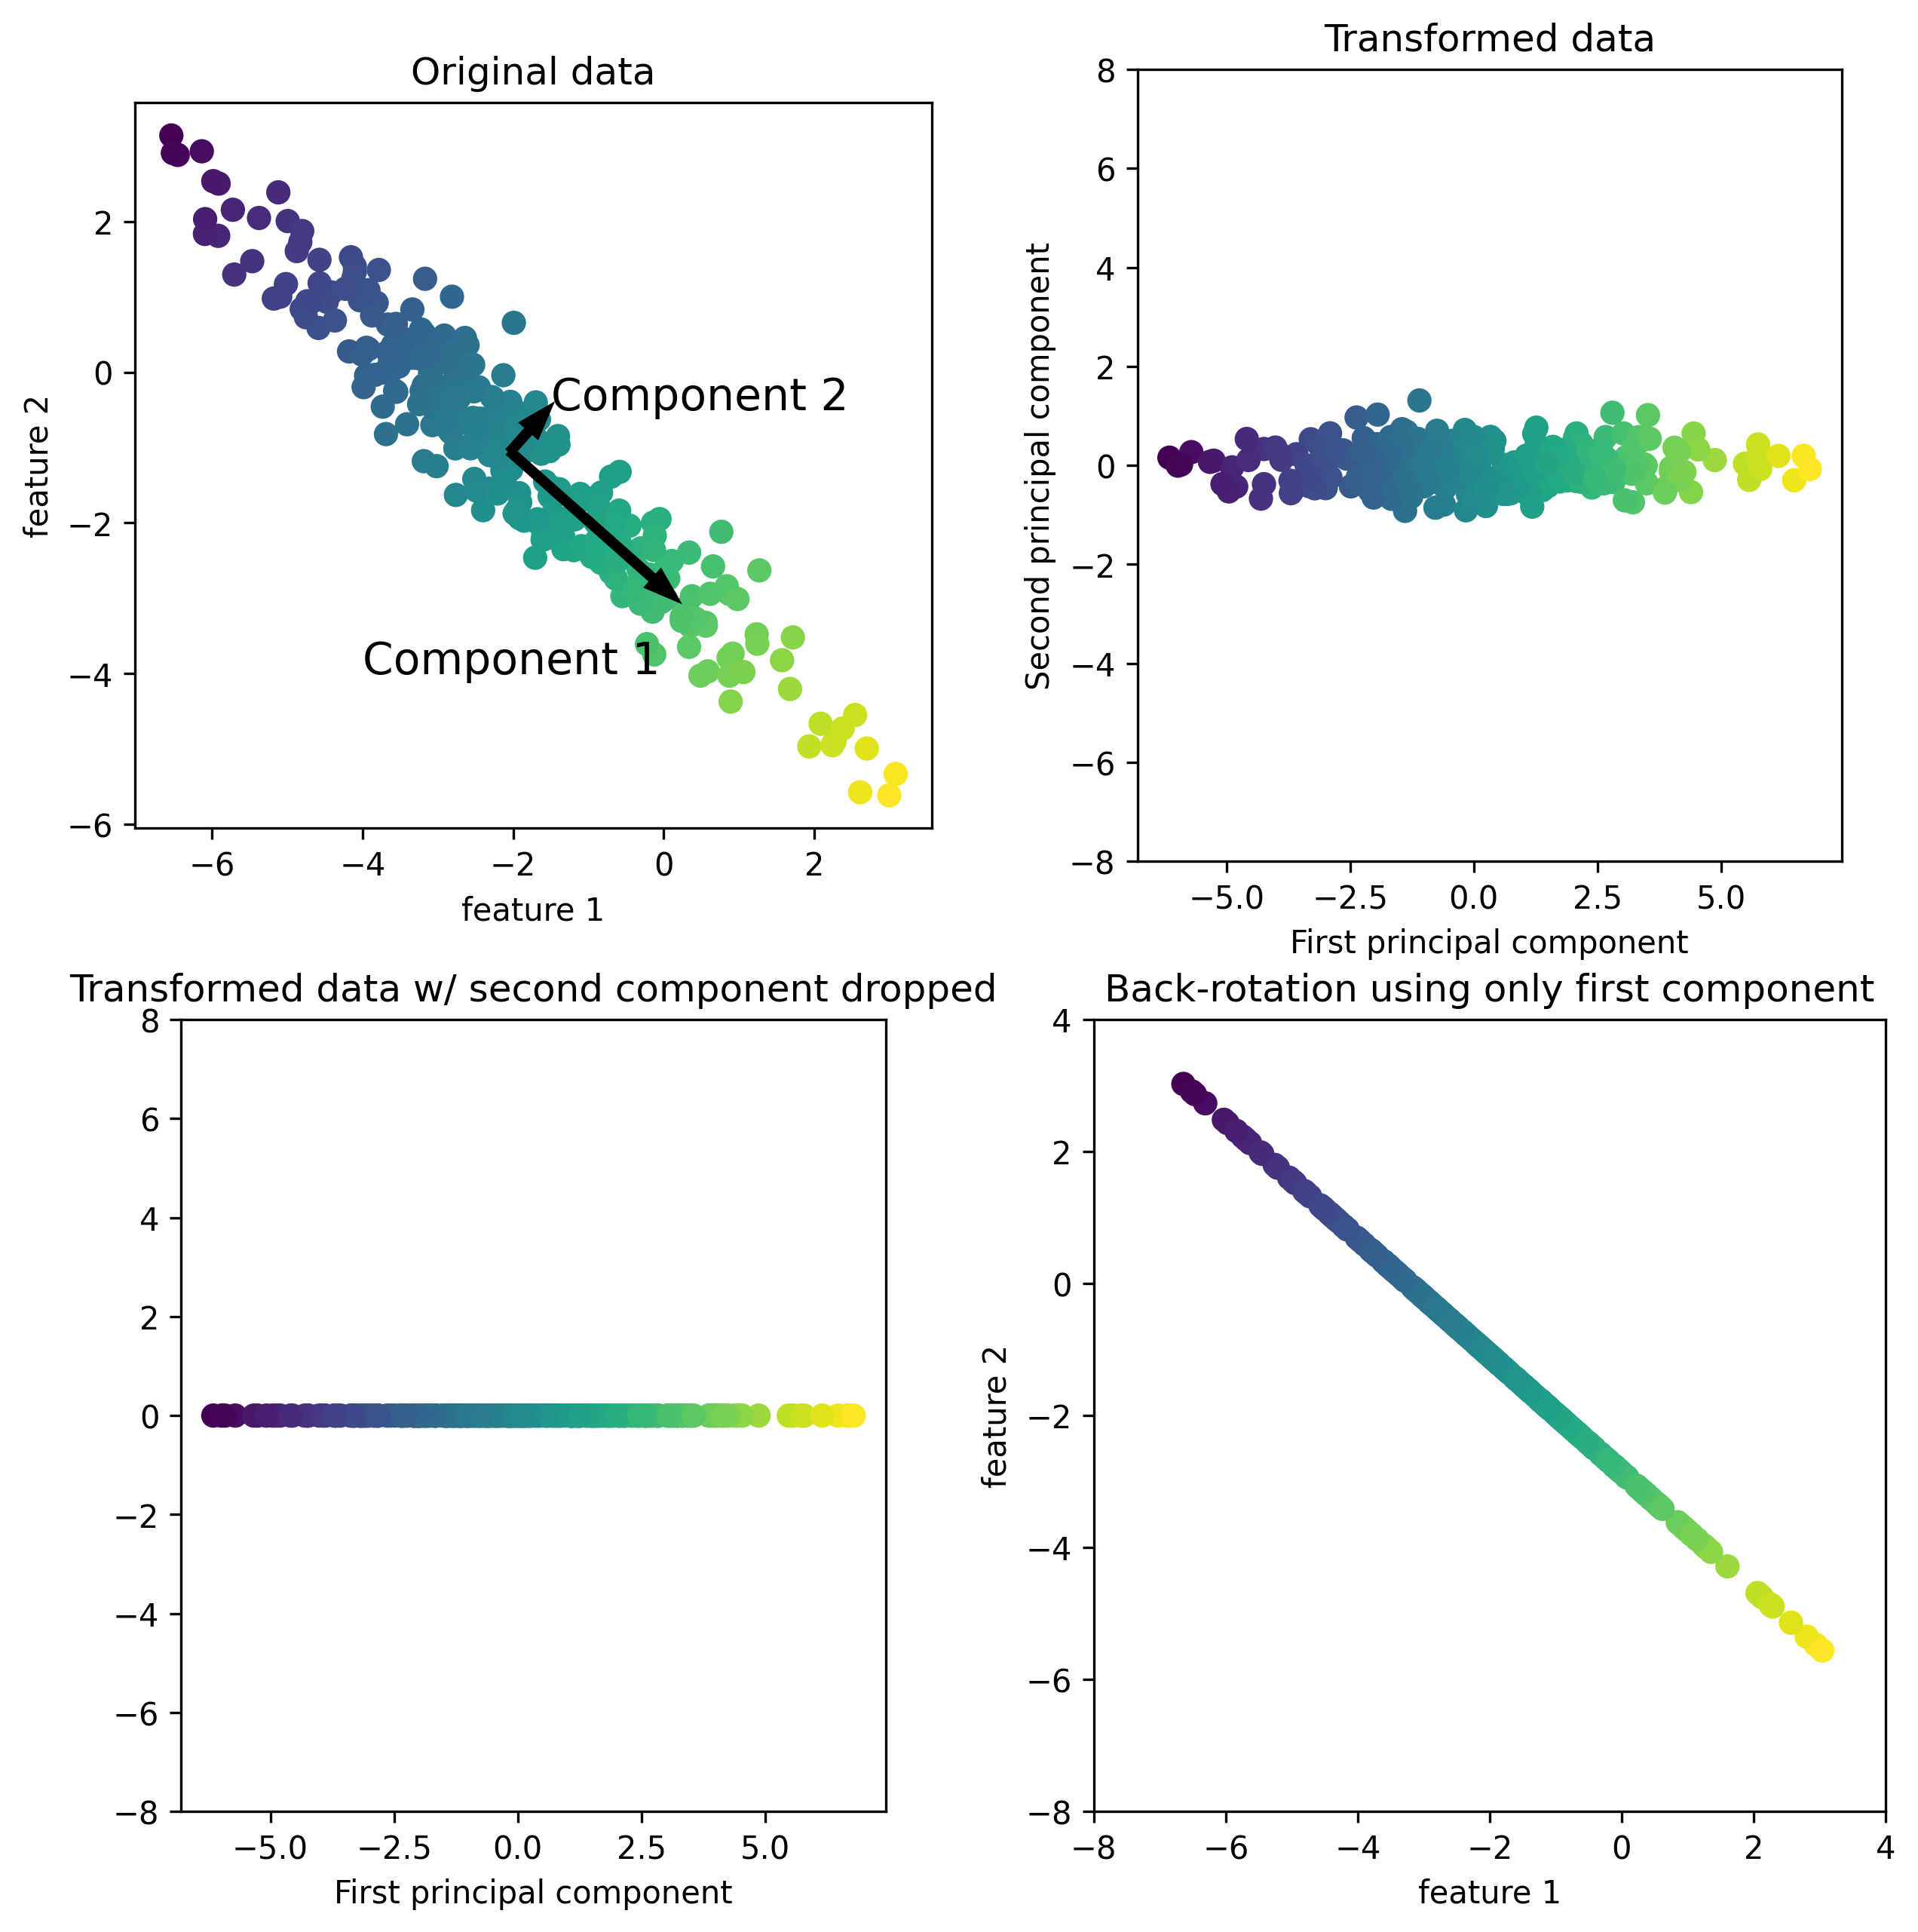

In [19]:
mglearn.plots.plot_pca_illustration()

##### Applying PCA to the cancer dataset for visualization

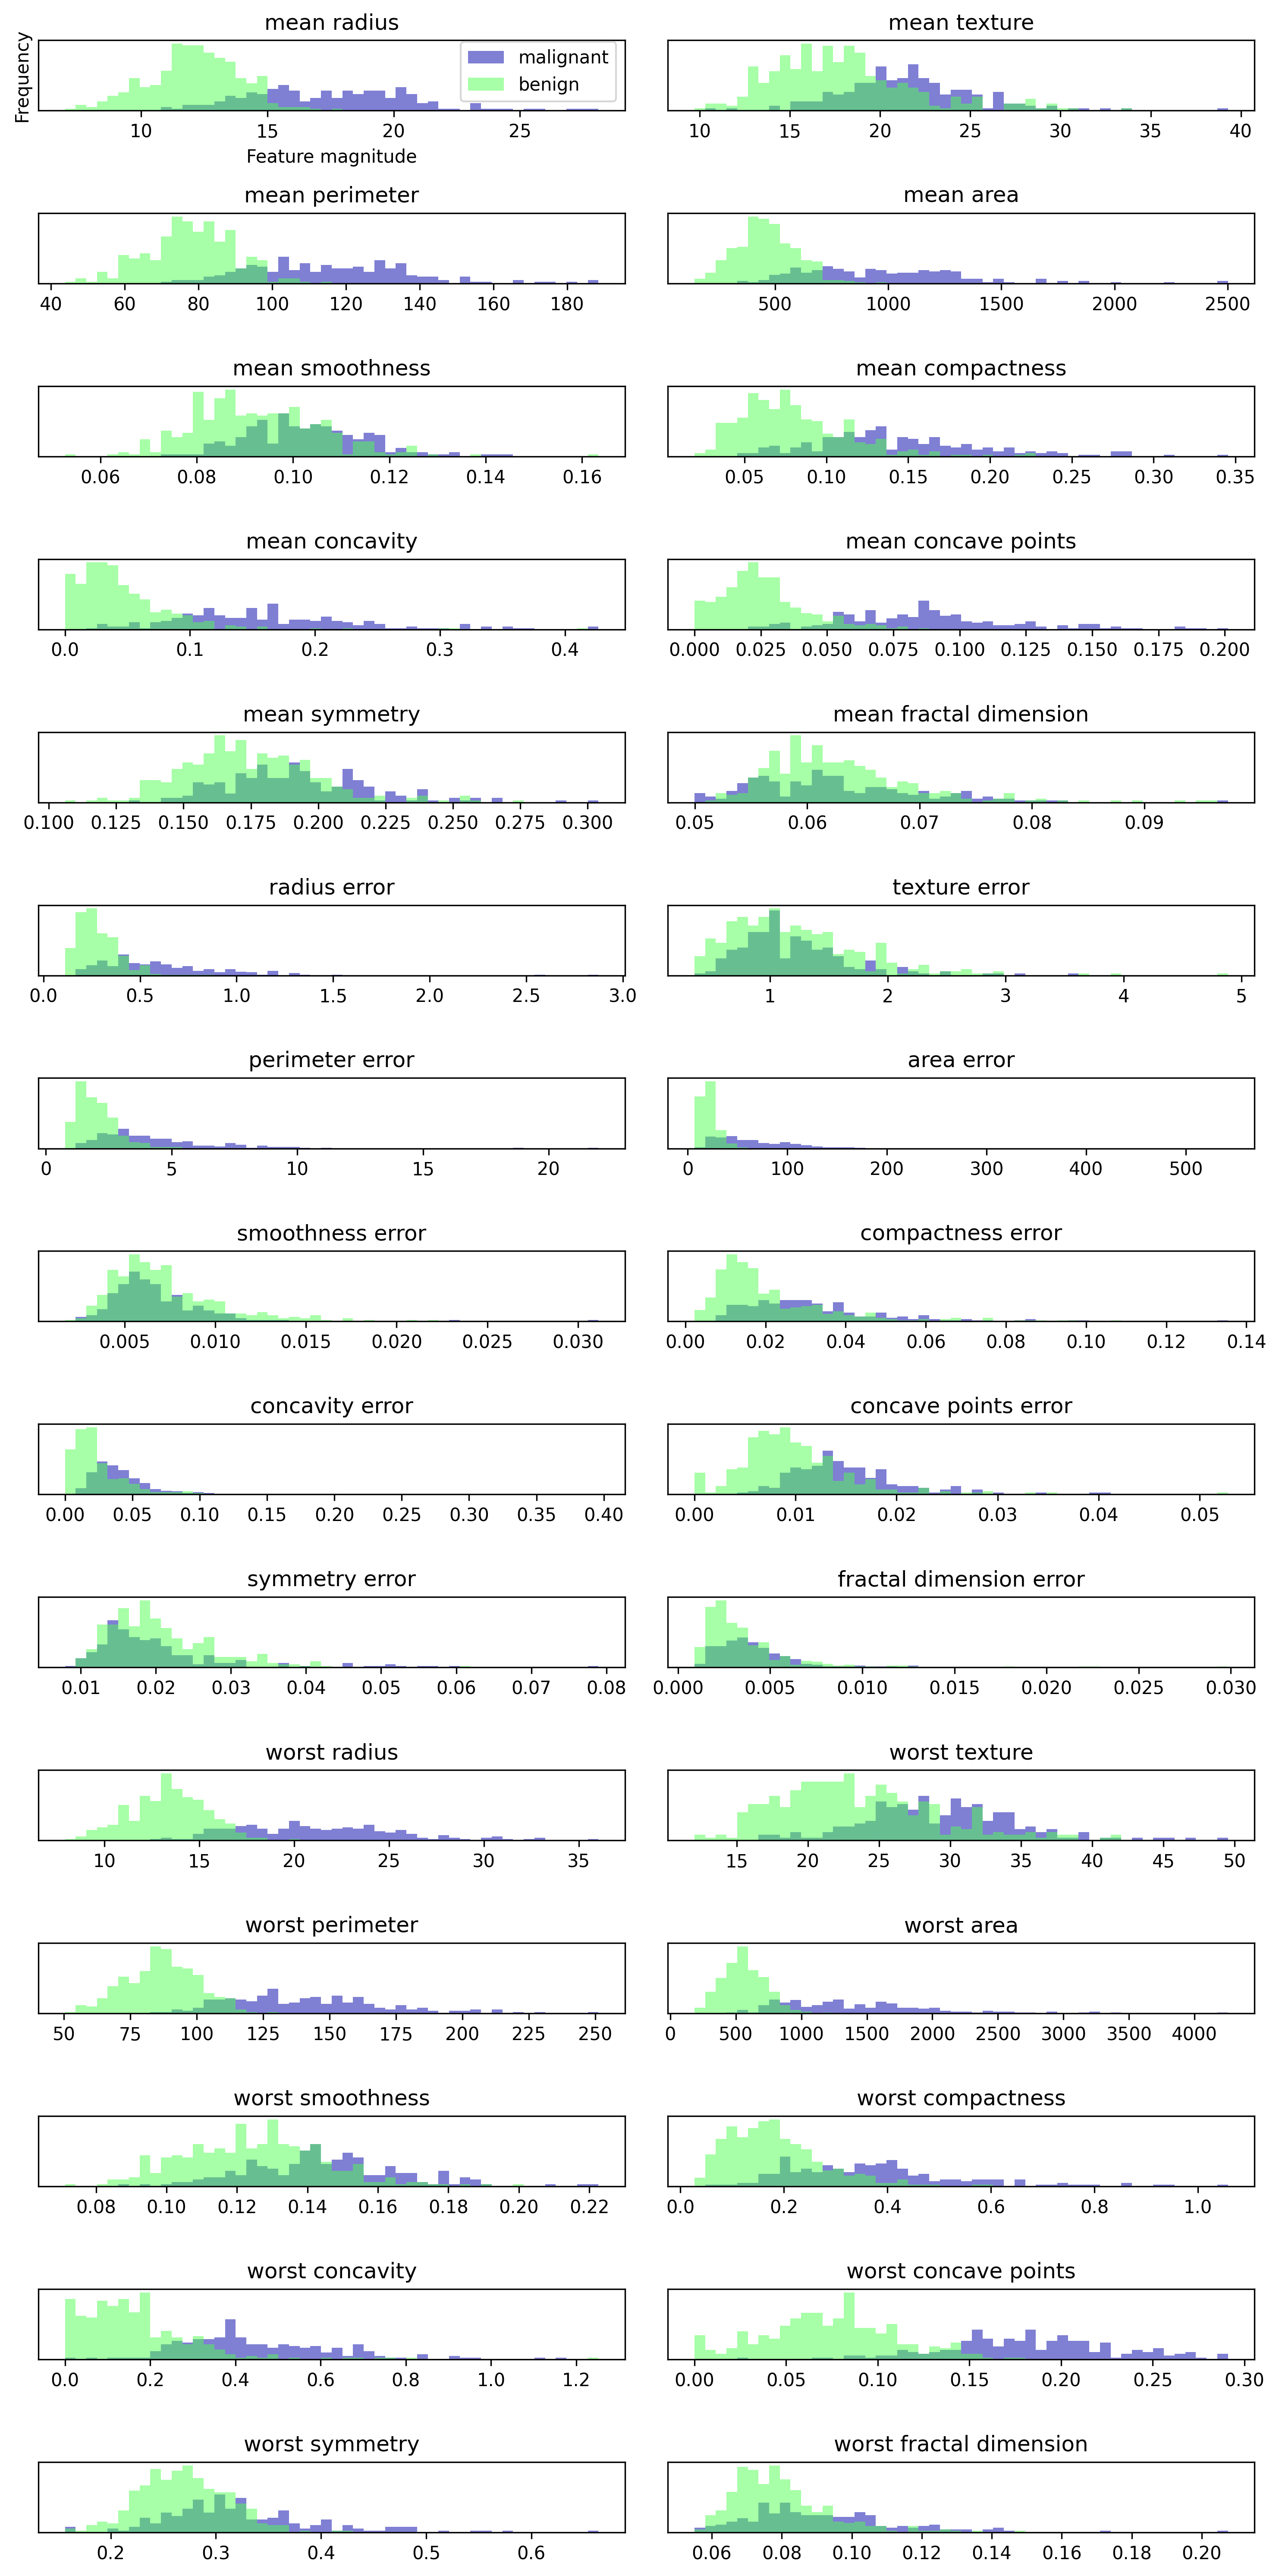

In [20]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [21]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.preprocessing import StandardScaler
#cancer = load_breast_cancer()

#scaler = StandardScaler()
# calculate means and std devs:
scaler.fit(cancer.data)
# creates standardized variables:
X_scaled = scaler.transform(cancer.data)

In [22]:
#from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

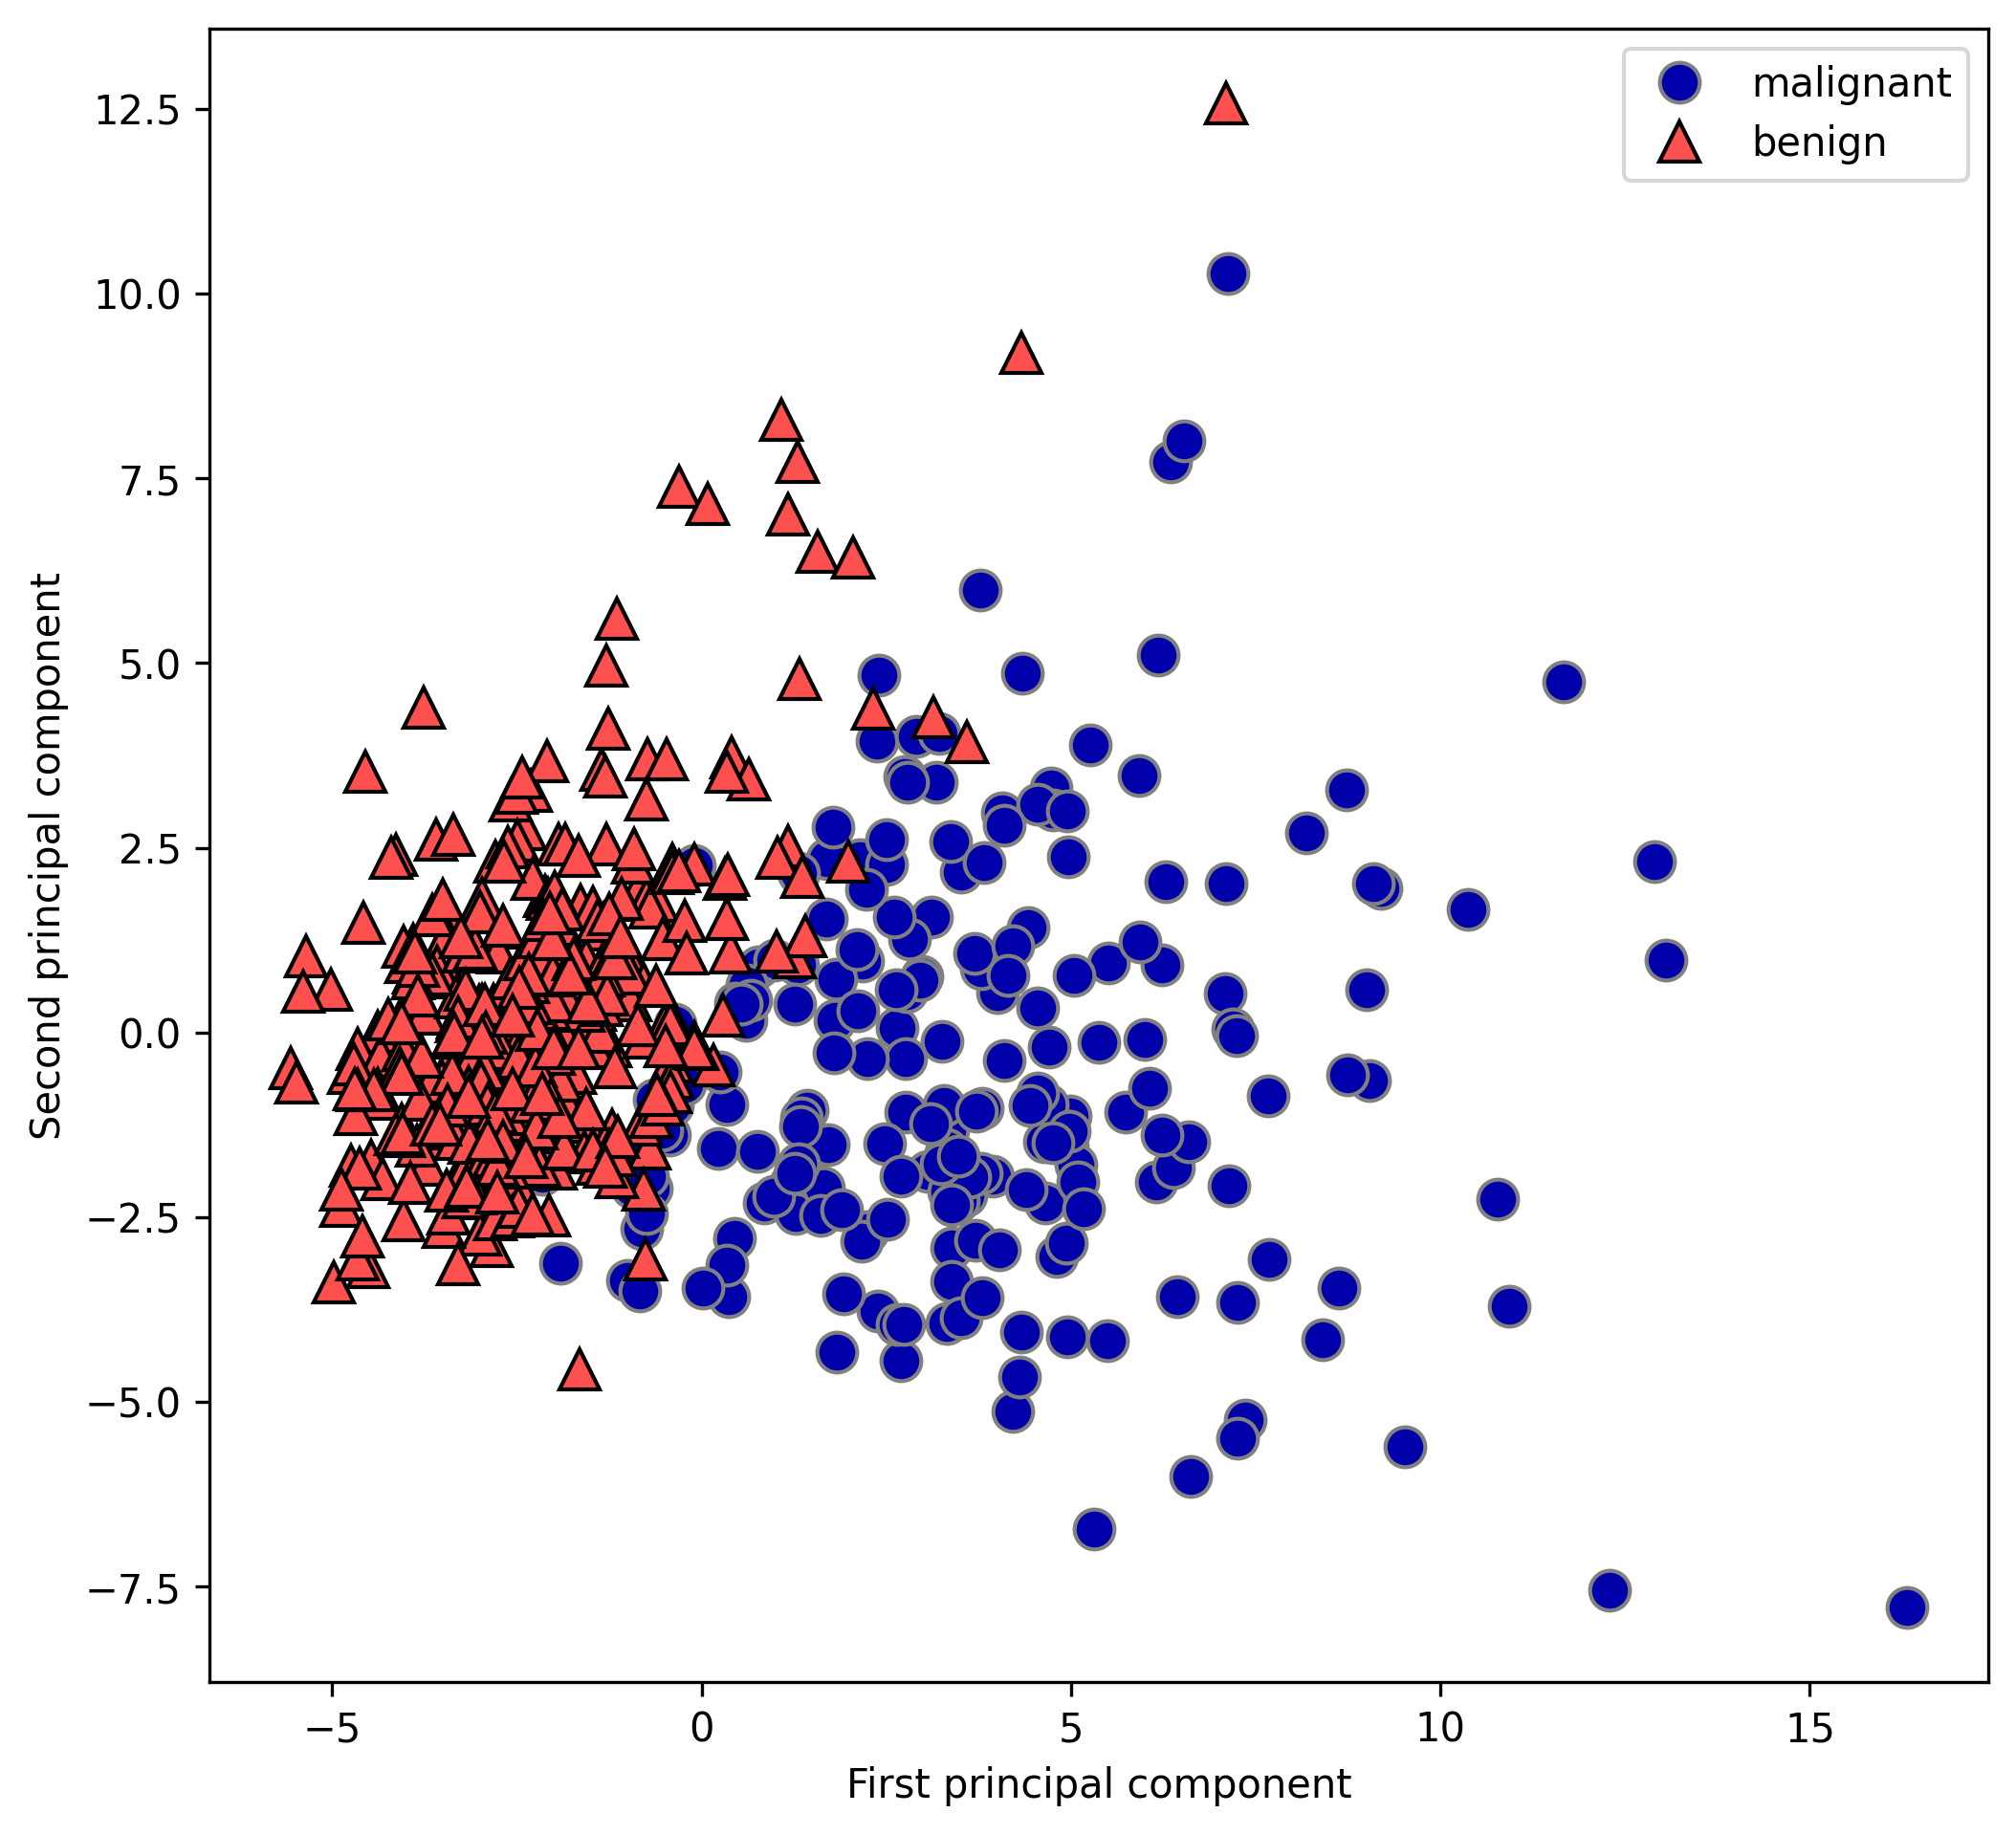

In [23]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [24]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [25]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


In [26]:
# regress cancer indicator on (30 characteristics) and then (2 PC)
y =cancer.target
lm.fit(X_scaled,y)
lm.score(X_scaled,y)

0.7743246526421793

In [27]:
# same thing but with only 2 PCs
lm.fit(X_pca,y)
lm.score(X_pca,y)

0.6524766713686472

Text(0, 0.5, 'Principal components')

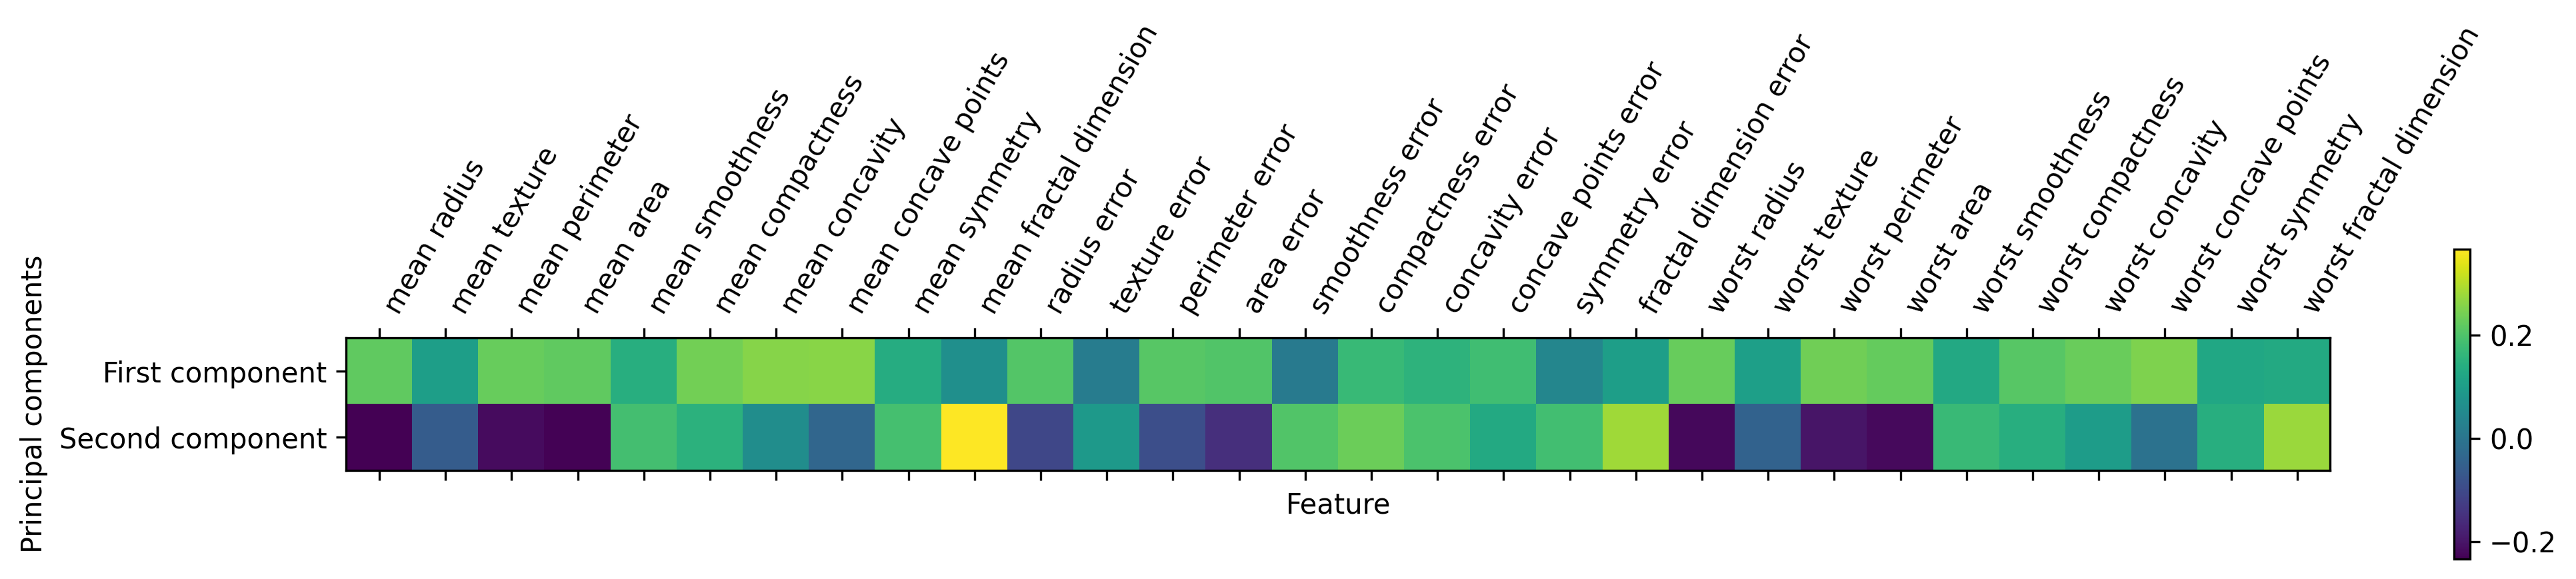

In [28]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

##### Eigenfaces for feature extraction

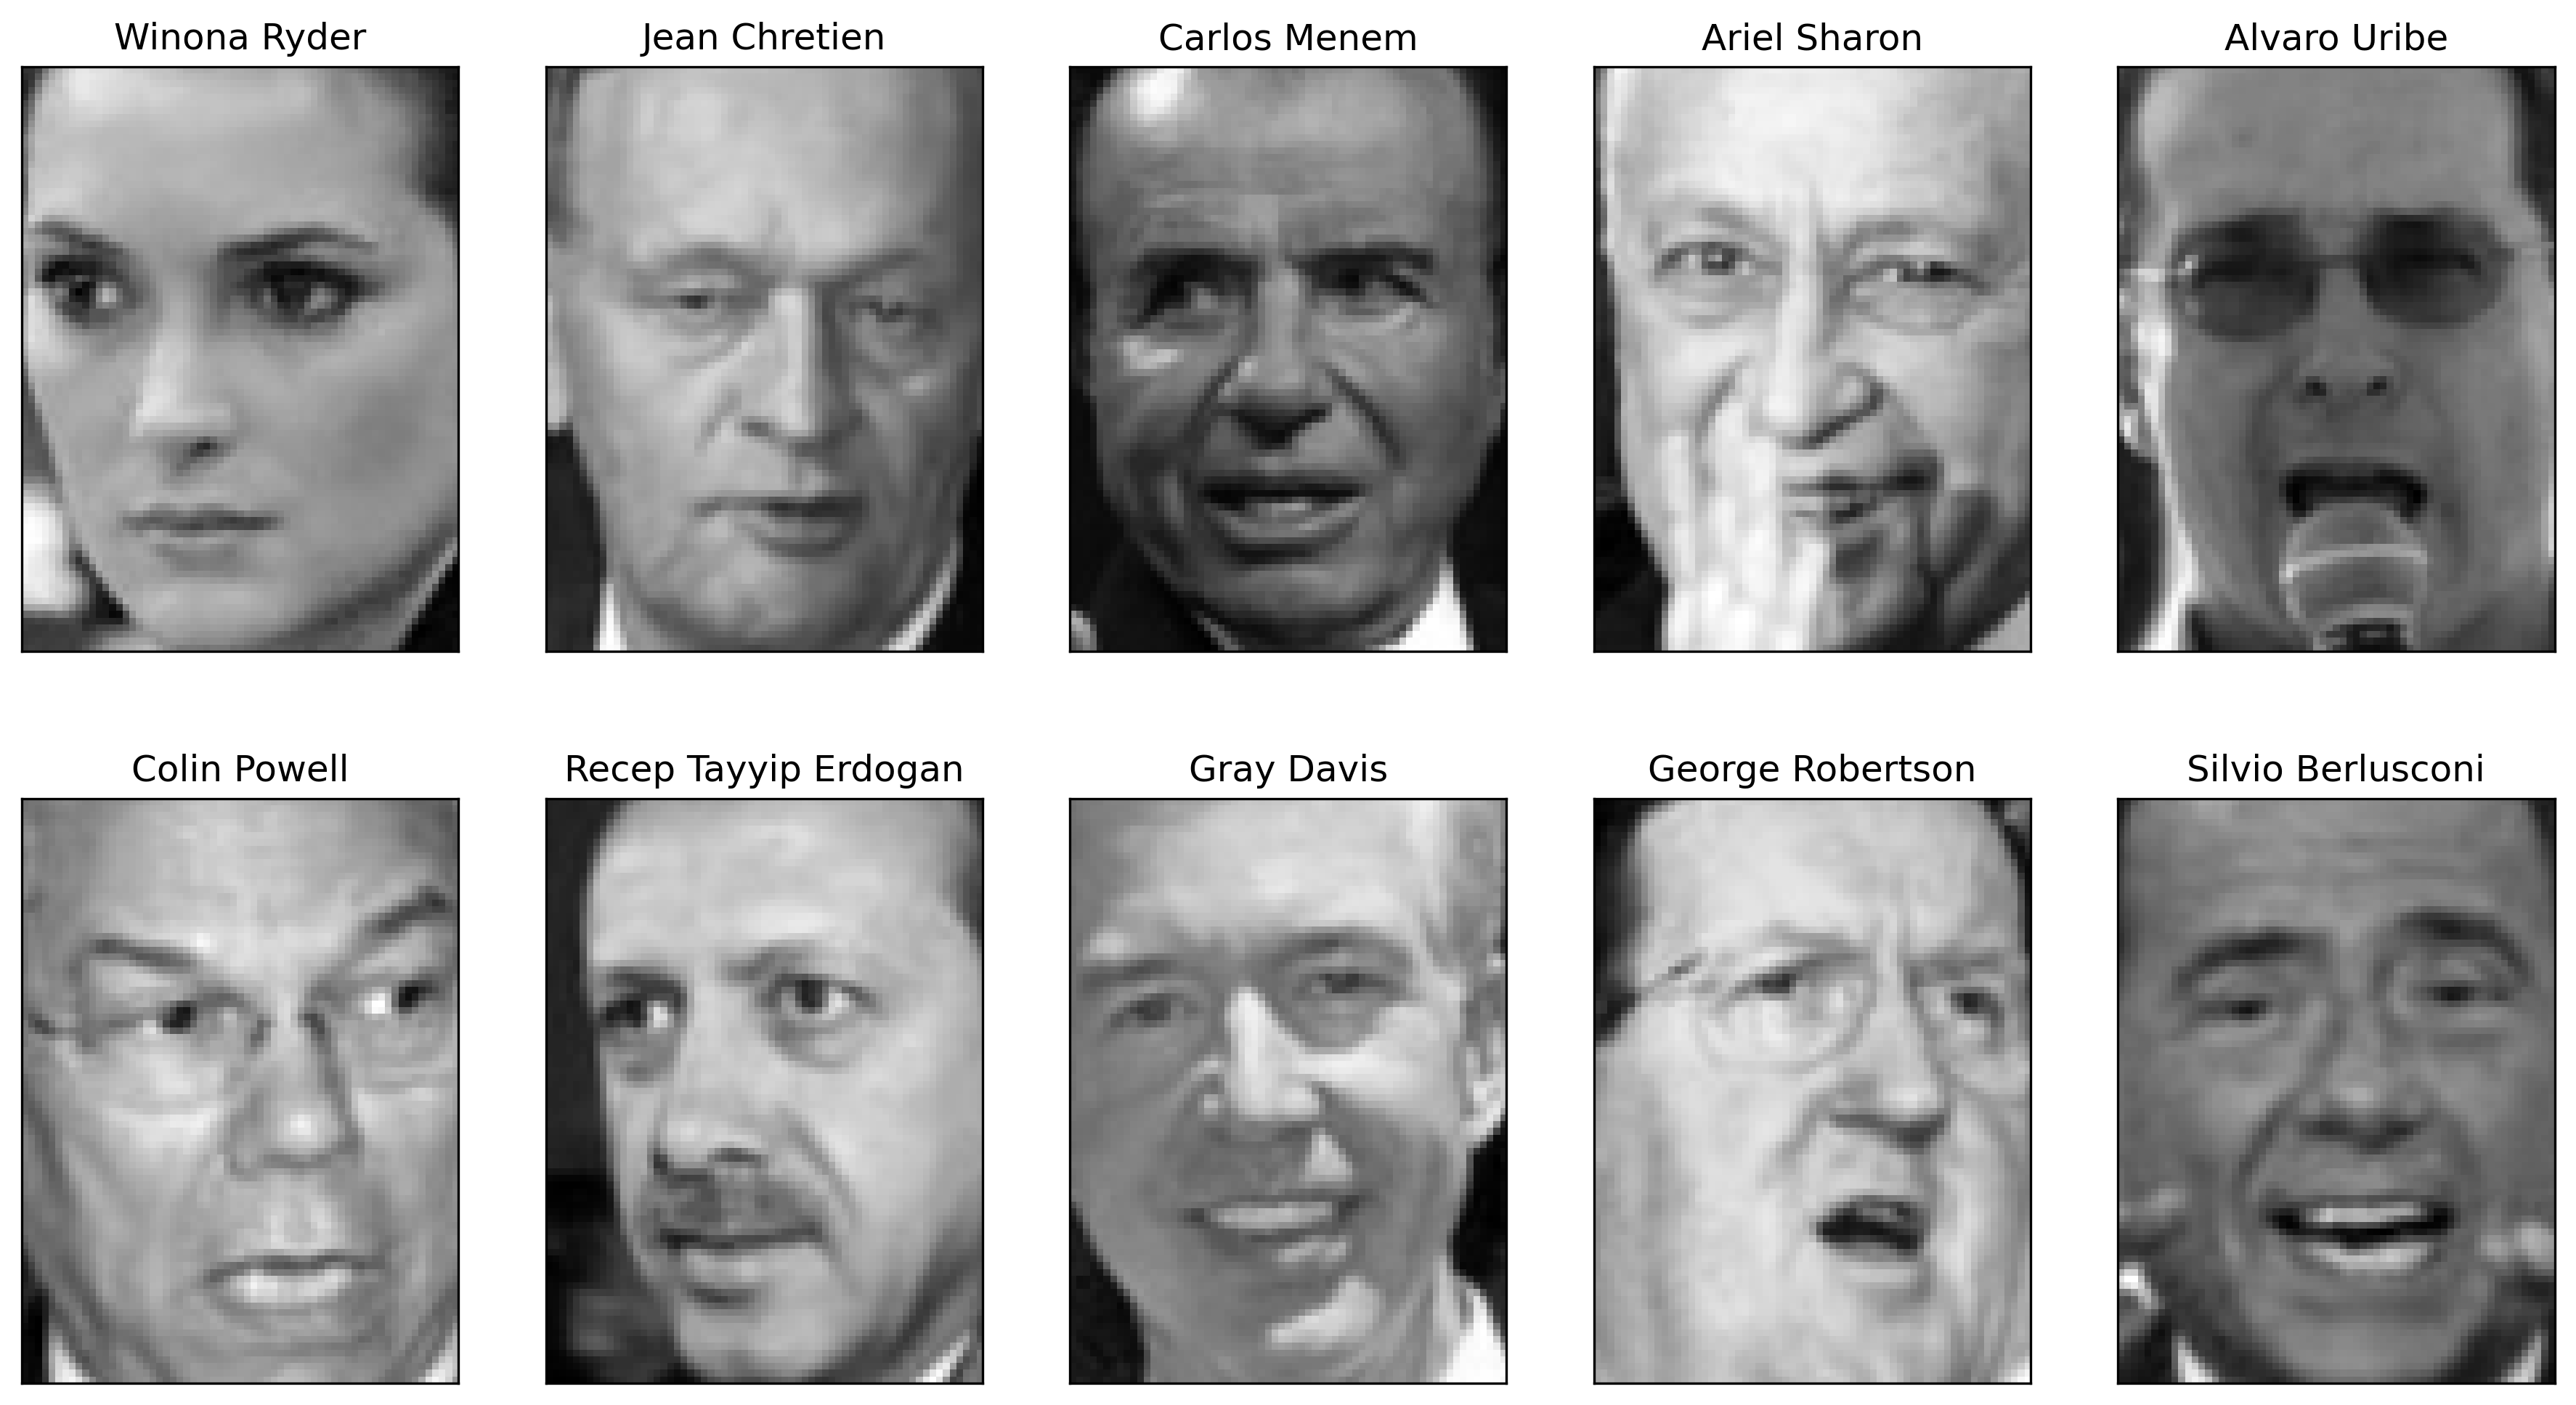

In [29]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [30]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [31]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [32]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
#X_people = X_people / 255.

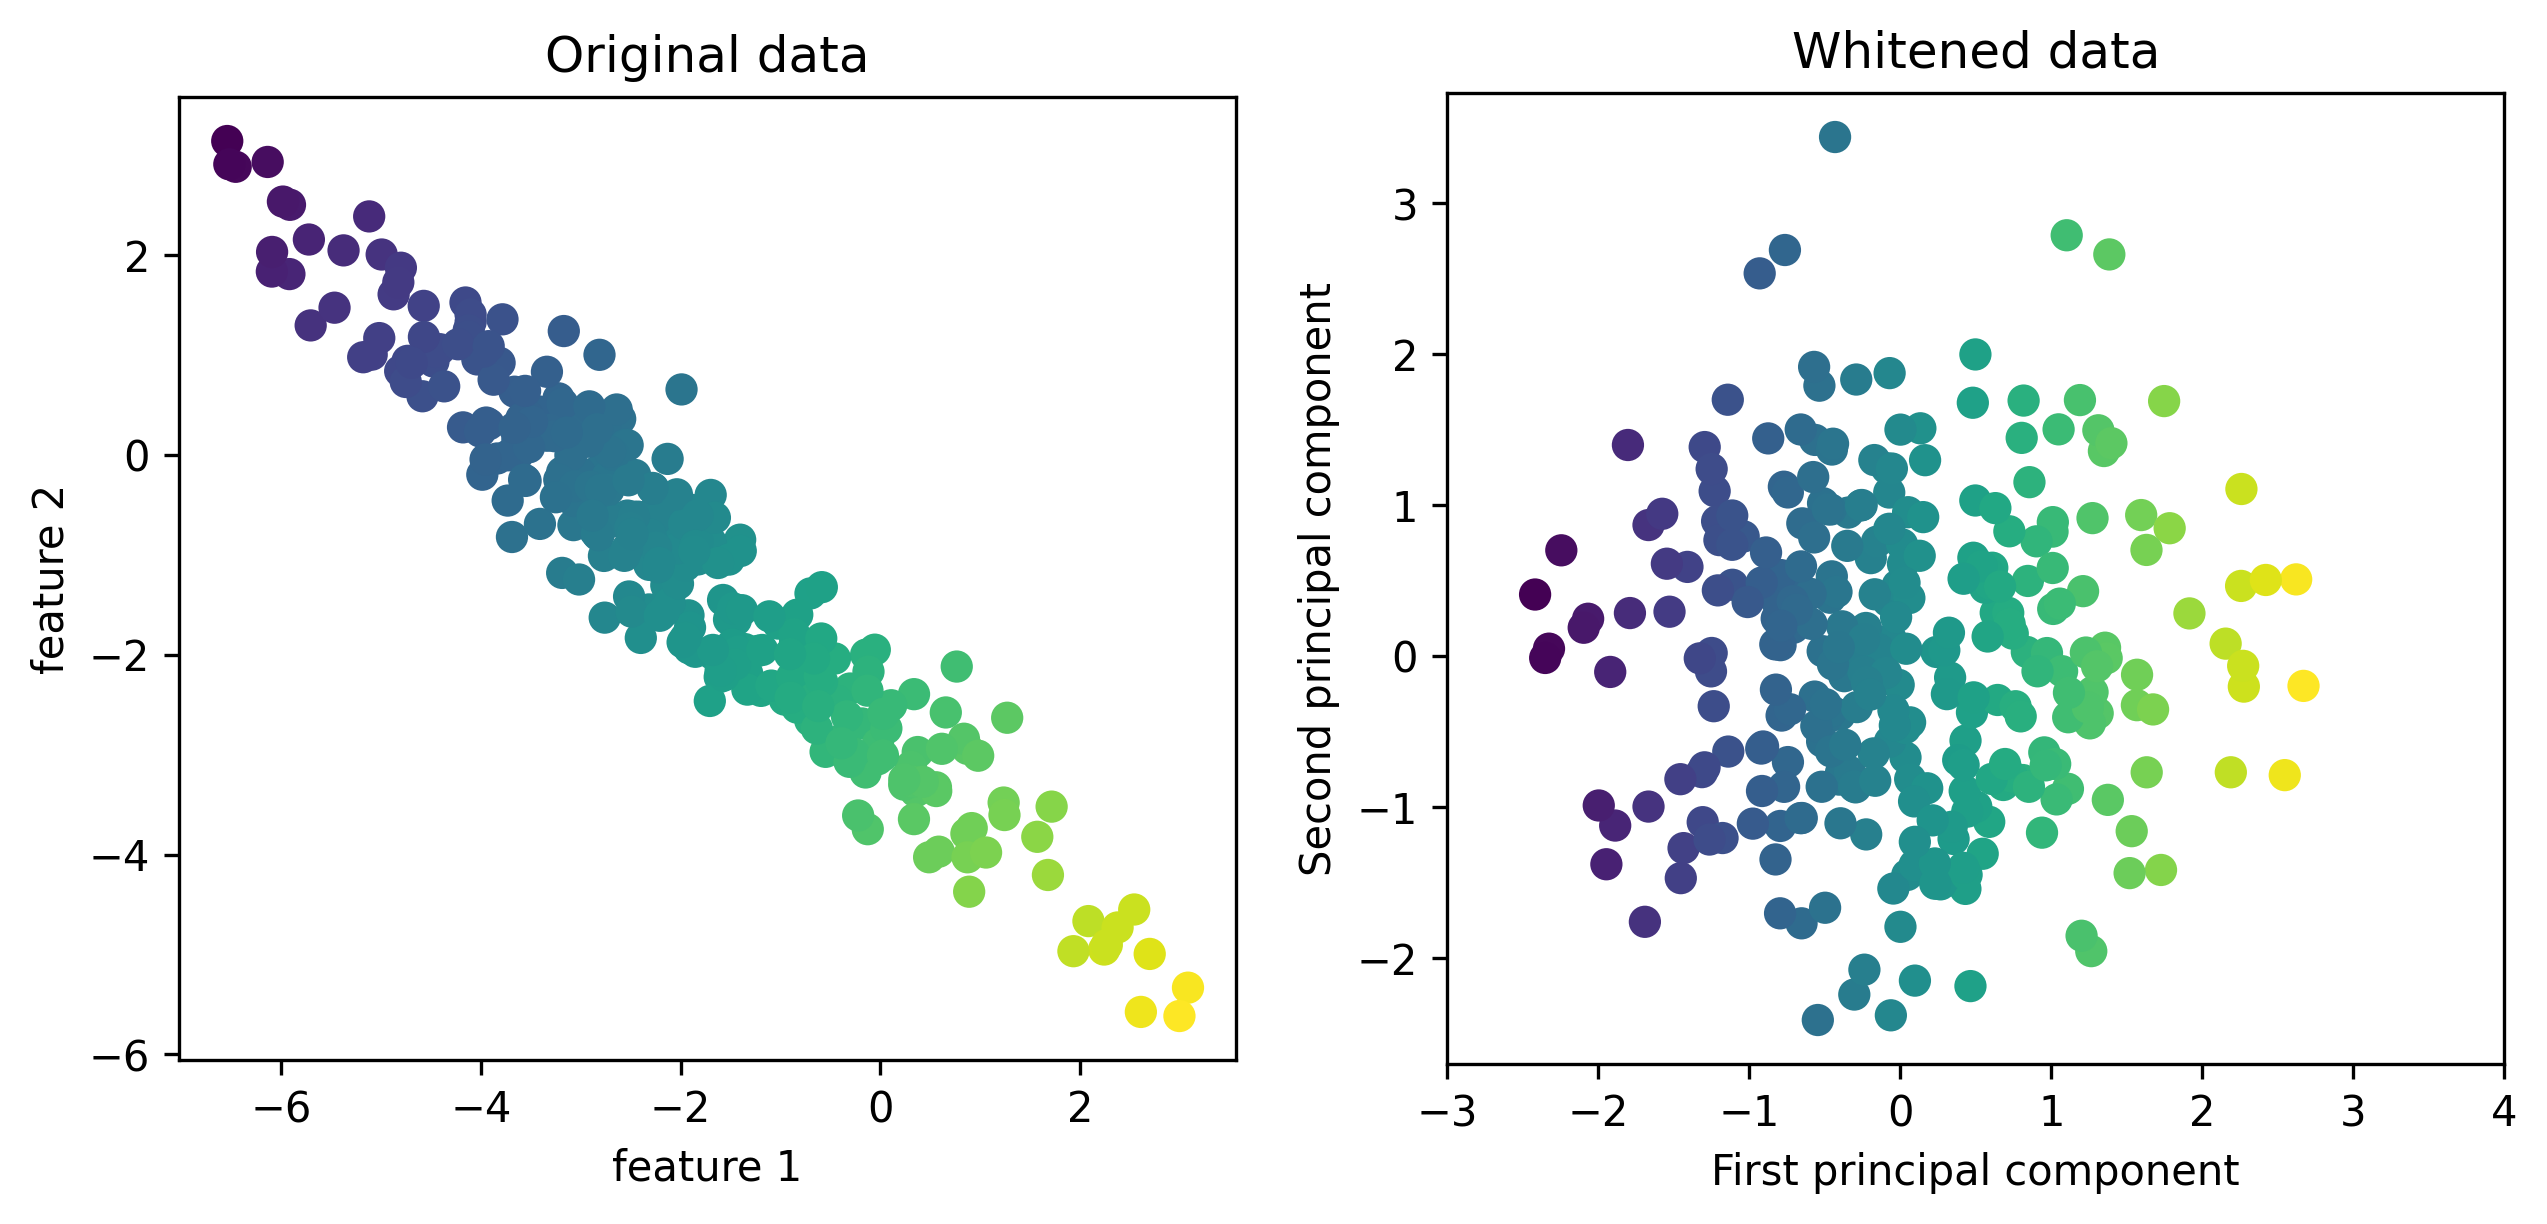

In [33]:
mglearn.plots.plot_pca_whitening()

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_people)
X_pca = pca.transform(X_people)

print("X_pca.shape: {}".format(X_pca.shape))

In [ ]:
print("pca.components_.shape: {}".format(pca.components_.shape))

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

![decomposition](https://github.com/brighamfrandsen/econ484/blob/master/examples/images/03-face_decomposition.png?raw=1)

In [ ]:
mglearn.plots.plot_pca_faces(X_people, X_people,image_shape)